<a href="https://colab.research.google.com/github/thamizharasia2019/Desktop/blob/master/binary_class_CRICVA_classification_from_CRICVA_cells_0_311_040820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import *
from fastai.metrics import accuracy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
PATH="/content/drive/My Drive/CRICVA_DB_Cells_binary/"

In [ ]:
bs = 16 #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
#PATH = './Monkeys Faces/'

Let's retrieve the image classes,

In [ ]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  3 classes:
 ['malign', 'normal', 'models']


Let's verify there are not any corrupt images that cannot be read. If found any, they will simply be deleted.

In [ ]:
# PATH1="/content/drive/My Drive/CRICVA_TEST/"

In [ ]:
tfms=get_transforms(do_flip=True,flip_vert=True, max_rotate=270)

# tfms=get_transforms()

# data  = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

data  = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, size=sz, bs=bs, valid_pct=0.99).normalize(imagenet_stats)

In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 30 training images and 2921 validation images.


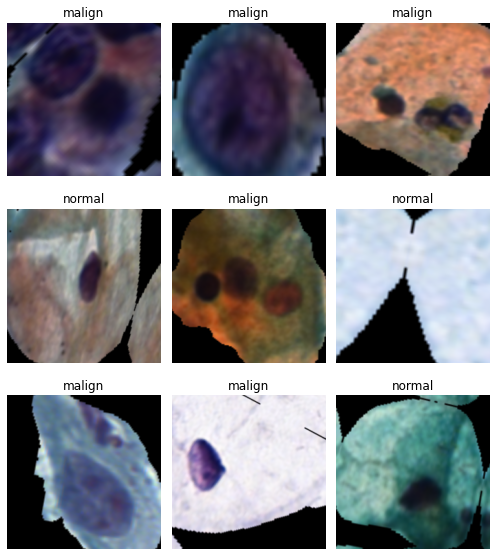

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
# fscore = FBeta(average='macro', beta=1)??

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics= [accuracy ])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Let's now pick the appropriate learning rate parameter,

In [ ]:
learn.load('binary_H9952')
# learn.unfreeze()
# learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-5), callbacks=[ShowGraph(learn),  SaveModelCallback(learn, every='improvement', monitor='accuracy', name='seven_I')])

Learner(data=ImageDataBunch;

Train: LabelList (30 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malign,malign,malign,malign,malign
Path: /content/drive/My Drive/CRICVA_DB_Cells_binary;

Valid: LabelList (2921 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malign,malign,normal,malign,malign
Path: /content/drive/My Drive/CRICVA_DB_Cells_binary;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

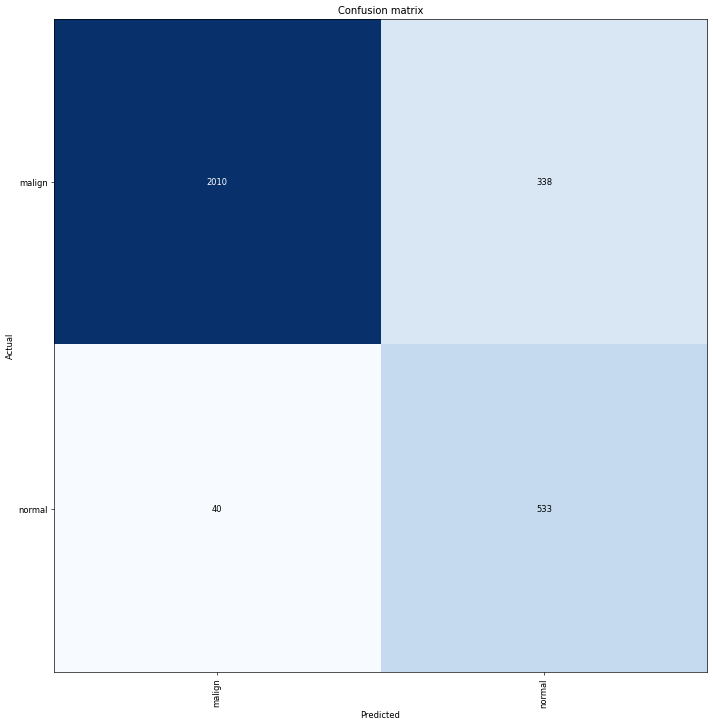

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# preds,y = learn.get_preds()
preds, targets = learn.TTA()
predicted_classes = np.argmax(preds, axis=1)
y_pred=predicted_classes.numpy()
y_true=targets.numpy()

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_true, y_pred))

[[2009  339]
 [  35  538]]


In [ ]:
print(metrics.classification_report(y_true, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.98288   0.85562   0.91485      2348
           1    0.61345   0.93892   0.74207       573

    accuracy                        0.87196      2921
   macro avg    0.79817   0.89727   0.82846      2921
weighted avg    0.91041   0.87196   0.88095      2921



In [ ]:
# data  = ImageDataBunch.from_folder(PATH1,  size=sz, bs=bs, valid_pct=0.99,test_name='CRICVA_TEST' ).normalize(imagenet_stats)
# data = ImageClassifierData.from_paths(PATH1, tfms= tfms, bs=bs, test_name=?'CRICVA_TEST')

In [ ]:
learn.load('binary_H9952')

Learner(data=ImageDataBunch;

Train: LabelList (30 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malign,malign,malign,malign,malign
Path: /content/drive/My Drive/CRICVA_DB_Cells_binary;

Valid: LabelList (2921 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
malign,malign,normal,malign,malign
Path: /content/drive/My Drive/CRICVA_DB_Cells_binary;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): 

In [ ]:
preds,y = learn.get_preds()

In [ ]:
preds, targets = learn.TTA()


In [ ]:
targets

tensor([0, 0, 1,  ..., 1, 1, 0])

In [ ]:
predicted_classes = np.argmax(preds, axis=1)



In [ ]:
predicted_classes.type()

'torch.LongTensor'

In [ ]:
predicted_classes_f=predicted_classes.float()

In [ ]:
predicted_classes_f.type()

'torch.FloatTensor'

In [ ]:
accuracy(preds, y)

tensor(0.8757)

In [ ]:
preds

tensor([[2.9671e-01, 7.0329e-01],
        [9.9981e-01, 1.8660e-04],
        [5.8190e-04, 9.9942e-01],
        ...,
        [3.9313e-02, 9.6069e-01],
        [1.4628e-03, 9.9854e-01],
        [8.2819e-01, 1.7181e-01]])

In [ ]:
y

tensor([0, 0, 1,  ..., 1, 1, 0])

In [ ]:
from fastai.metrics import Precision

In [ ]:
r2_score(predicted_classes.float(), y.float())

tensor(0.2119)

In [ ]:
roc_curve(y,predicted_classes)

/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:293: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  distinct_value_indices = torch.nonzero(d).transpose(0,1)[0]


(tensor([0.0000, 0.0128, 1.0000]), tensor([0.0000, 0.6188, 1.0000]))

In [ ]:
 auc_roc_score(y,predicted_classes)

tensor(0.8030)

In [ ]:
preds.shape

torch.Size([2921, 2])

In [ ]:
fbeta(predicted_classes.view(1,2921), targets.view(1,2921), thresh=0.1, beta=2, sigmoid=False)

tensor(0.8611)

In [ ]:
fbeta(predicted_classes.view(1,2921), targets.view(1,2921), thresh=0.1, beta=1, sigmoid=False)

tensor(0.7509)

In [ ]:
explained_variance(predicted_classes.float(), targets.float())

tensor(0.2838)

In [ ]:
TP = 1296   ; FP =64  ; TN =413   ;FN = 51

In [ ]:
precision = TP/ (TP+FP) ; print(precision)


0.9529411764705882


In [ ]:
recall= TP / (TP +FN) ; print(recall)

0.9621380846325167


In [ ]:
sensitivity = TP / (TP+FN) ; print(sensitivity)

0.9621380846325167


In [ ]:
specificity = TN / (TN +FP)  ; print(specificity)

0.8658280922431866


In [ ]:
print(interp)

In [ ]:
# path = '/content/drive/My Drive/dataset_smear_seg/carcinoma_in_situ/'  #The path of your test image

import skimage
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
learn.load('binary_H9952')
path = "/content/drive/My Drive/CRICVA_TEST/malign"
# path = '/content/drive/My Drive/TRIALS_IMAGES/CRICVA_DB_Cells45_crop/ASC-H/'
filecount=len(get_image_files(path))
print('File count :' +str(filecount))
# print(len(get_image_files(path)))
fileno=0
acc=0
for i in range(filecount):

  img = open_image(get_image_files(path)[i])
  img_path=get_image_files(path)[i]
  name=str(get_image_files(path)[i]).rsplit('/',1)[1]
  #print(type(get_image_files(path)[i]))
  #name = ""
  pred_class,pred_idx,outputs = learn.predict(img)
  print(outputs)
  img = io.imread(img_path)
  height, width, depth = img.shape
  if fileno>5:
    break
  # print(pred_idx)
  # print(height)
  # print(width)
  if height>30 and width>30:
    #io.imshow(img)
    #plt.figure(figsize=(15,15))
                    # plt.axis('off')
  
    #plt.show()
    # img.show()
    actual_class= path.rsplit('/', 1)[1]
    # print(actual_class)
    class_name=str(pred_class)
    if class_name==actual_class:
        acc=acc+1
    print( 'Fileno :' +str(fileno) + '  ' + name + '    Predicted class :' + class_name + ' Actual class :'+actual_class)
    fileno=fileno+1
  else:
    continue
  # print ("It is ", pred_class)
print('Total no. of images in ',actual_class, '  is  ', filecount)
print('Total no. of images in appropriate size  in ',actual_class, '  is  ', fileno)
print('No. of images correctly classified is  ', acc)
accper=(acc/fileno) *100
print('Accuracy  of class:  ' , actual_class, ' is ', str(accper))

File count :1363
tensor([0.9860, 0.0140])
Fileno :0  1e4460705ccdffafa78ceef35bf11ad2_3_0_8164.png    Predicted class :malign Actual class :malign
tensor([0.5803, 0.4197])
Fileno :1  1e4460705ccdffafa78ceef35bf11ad2_3_0_9362.png    Predicted class :malign Actual class :malign
tensor([9.9990e-01, 9.8761e-05])
Fileno :2  1e4460705ccdffafa78ceef35bf11ad2_4.png    Predicted class :malign Actual class :malign
tensor([0.9957, 0.0043])
Fileno :3  1e4460705ccdffafa78ceef35bf11ad2_4_0_1661.png    Predicted class :malign Actual class :malign
tensor([0.3134, 0.6866])
Fileno :4  1e4460705ccdffafa78ceef35bf11ad2_4_0_3071.png    Predicted class :normal Actual class :malign
tensor([0.9836, 0.0164])
Fileno :5  1e4460705ccdffafa78ceef35bf11ad2_4_0_5196.png    Predicted class :malign Actual class :malign
tensor([0.9946, 0.0054])
Total no. of images in  malign   is   1363
Total no. of images in appropriate size  in  malign   is   6
No. of images correctly classified is   5
Accuracy  of class:   malign  i

In [ ]:
import skimage
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
learn.load('binary_H9952')
path = "/content/drive/My Drive/CRICVA_TEST/normal"
# path = '/content/drive/My Drive/TRIALS_IMAGES/CRICVA_DB_Cells45_crop/ASC-H/'
filecount=len(get_image_files(path))
print('File count :' +str(filecount))
# print(len(get_image_files(path)))
fileno=0
acc=0
for i in range(filecount):

  img = open_image(get_image_files(path)[i])
  img_path=get_image_files(path)[i]
  name=str(get_image_files(path)[i]).rsplit('/',1)[1]
  #print(type(get_image_files(path)[i]))
  #name = ""
  pred_class,pred_idx,outputs = learn.predict(img)
  img = io.imread(img_path)
  height, width, depth = img.shape
  #if fileno>7000:
  #  break
  # print(pred_idx)
  # print(height)
  # print(width)
  if height>30 and width>30:
    #io.imshow(img)
    #plt.figure(figsize=(15,15))
                    # plt.axis('off')
  
    #plt.show()
    # img.show()
    actual_class= path.rsplit('/', 1)[1]
    # print(actual_class)
    class_name=str(pred_class)
    if class_name==actual_class:
        acc=acc+1
    print( 'Fileno :' +str(fileno) + '  ' + name + '    Predicted class :' + class_name + ' Actual class :'+actual_class)
    fileno=fileno+1
  else:
    continue
  # print ("It is ", pred_class)
print('Total no. of images in ',actual_class, '  is  ', filecount)
print('Total no. of images in appropriate size  in ',actual_class, '  is  ', fileno)
print('No. of images correctly classified is  ', acc)
accper=(acc/fileno) *100
print('Accuracy  of class:  ' , actual_class, ' is ', str(accper))

File count :2399
Fileno :0  a42845987c650d7243ad0c08e97debf5_2.png    Predicted class :normal Actual class :normal
Fileno :1  a42845987c650d7243ad0c08e97debf5_9_0_1285.png    Predicted class :normal Actual class :normal
Fileno :2  763240077e66777b2a196a6af78c9716_5_0_790.png    Predicted class :normal Actual class :normal
Fileno :3  49c8feec9afcd85f1f9b16908c34bdca_10_0_5648.png    Predicted class :normal Actual class :normal
Fileno :4  7cadcc842e5559cd14a3cd1143dd8db0_21_0_629.png    Predicted class :normal Actual class :normal
Fileno :5  edc3ac951f31fca241b7f04d2c5daac5_3.png    Predicted class :normal Actual class :normal
Fileno :6  763240077e66777b2a196a6af78c9716_5_0_9037.png    Predicted class :normal Actual class :normal
Fileno :7  3ae2fc6e5e6530f3291e21a8937c71b3_3.png    Predicted class :normal Actual class :normal
Fileno :8  b0fddd5dbd774fcc23ddf897ee7bf26c_11_0_421.png    Predicted class :normal Actual class :normal
Fileno :9  e9743b8e738f3f0bd2a084cbf8dc1cab_7_0_1645.png   

top k accuracy

In [ ]:
def findindex1(classname):
  if classname=='ASC-H':
    target_idx=0
  elif classname =='ASC-US':
    target_idx=1
  elif classname =='CA':
    target_idx=2
  elif classname =='HSIL':
    target_idx=3
  elif classname =='LSIL':
    target_idx=4
  elif classname =='Negative':
    target_idx=5
  return target_idx

In [ ]:
def findclass1(targetidx):
  if targetidx==0:
    classname='ASC-H'
    
  elif  targetidx==1:
    classname ='ASC-US'
   
  elif targetidx==2 :
     classname ='CA'
    
  elif  targetidx==3:
     classname ='HSIL'
   
  elif targetidx==4:
     classname ='LSIL'
    
  elif targetidx==5:
     classname ='Negative'
    
  return classname

In [ ]:
def secondlargest_index1(list_ten):
  list1=list(list_ten)
  newlist=list1
  newlist.remove(max(newlist))
  secondmax=max(newlist)
  index = list1.index(secondmax)
  return index



In [ ]:
import skimage
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
learn.load('sixsegbest_E9577')
path = '/content/drive/My Drive/TRIALS_IMAGES/CRICVA_DB_Cells45_crop/Negative/'
filecount=len(get_image_files(path))

actual_class= path.rsplit('/', 2)[1]
print(actual_class)
target_index=findindex1(actual_class)
print(target_index)

fileno=0
acc=0
top2_acc=0

for i in range(filecount):

  img = open_image(get_image_files(path)[i])
  img_path=get_image_files(path)[i]
  print(get_image_files(path)[i])
  pred_class,pred_idx,outputs = learn.predict(img)

  img = io.imread(img_path)
  height, width, depth = img.shape

  if height>30 and width>30:
    io.imshow(img)
    plt.figure(figsize=(15,15))
    # plt.axis('off')
  
    plt.show()
    

   
    class_name=str(pred_class)
    if class_name==actual_class:
        acc=acc+1
    print(' Top 1 : Predicted class :' + class_name + ' Actual class :'+actual_class)
    pred1=pred_idx.numpy()
    secondindex= secondlargest_index1(outputs)
    class_name_top2=findclass1(secondindex)
    if ( (secondindex==target_index) or (pred1==target_index) ):
      top2_acc=top2_acc+1
    print(' Top 2 : Predicted class :' + class_name_top2 + ' Actual class :'+actual_class)


    fileno=fileno+1
  else:
    continue
  # print ("It is ", pred_class)
print('Total no. of images in ',actual_class, '  is  ', filecount)
print('Total no. of images in appropriate size  in ',actual_class, '  is  ', fileno)
print('No. of images correctly classified is  ', acc)
accper=(acc/fileno) *100
print('Accuracy  of class using Top 1:  ' , actual_class, ' is ', str(accper))
print('No. of images correctly classified using top 2 is  ', top2_acc)
accper_top2=(top2_acc/fileno) *100
print('Accuracy  of class using Top 2:  ' , actual_class, ' is ', str(accper_top2))

In [ ]:
# # This is for accuracy in top 3, change k to other values as needed
# def accuracy_topk(output, target, topk=(3,)):
#    """Computes the precision@k for the specified values of k"""
   
#    maxk = max(topk)
#   #  batch_size = len(target)
#   #  batch_size = target.size
#    batch_size = 1
#    print(batch_size)
#    _, pred = output.topk(maxk, 1, True, True)
#    pred = pred.t()
#    print(pred)
#    correct = pred.eq(target.view(1, -1).expand_as(pred))
 
#    res = []
#    for k in topk:
#     correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
#     res.append(correct_k.mul_(100.0 / batch_size))
#    return res